<a href="https://colab.research.google.com/github/nimnathw/solar-power-generation/blob/main/solar_power_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  i

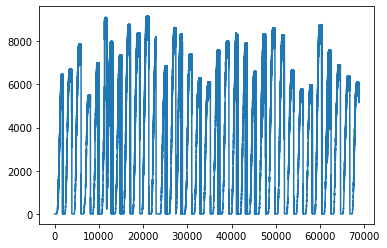

In [1]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

plant_1_gen = "/content/drive/MyDrive/Colab Notebooks/Plant_1_Generation_Data.csv"
plant_1_weather = "/content/drive/MyDrive/Colab Notebooks/Plant_1_Weather_Sensor_Data.csv"
plant_2_gen = "/content/drive/MyDrive/Colab Notebooks/Plant_2_Generation_Data.csv"
plant_2_weather = "/content/drive/MyDrive/Colab Notebooks/Plant_2_Weather_Sensor_Data.csv"

gen_1 = pd.read_csv(plant_1_gen)
weather_1 = pd.read_csv(plant_1_weather)
gen_2 = pd.read_csv(plant_2_gen)
weather_2 = pd.read_csv(plant_2_weather)

# Check gen_1 dataframe overall data
print(gen_1.head(5))
print(gen_1.columns)
print(gen_1.info())
print("Missing values: \n", gen_1.isnull().sum(axis=0))
gen_1['DATE_TIME'] = pd.to_datetime(gen_1['DATE_TIME'])

plt.plot(gen_1.DAILY_YIELD)

In [2]:
# Check weather_1 dataframe overall data
print(weather_1.head(5))
print(weather_1.columns)
print(weather_1.info())
print("Missing values: \n", weather_1.isnull().sum(axis=0))
weather_1['DATE_TIME'] = pd.to_datetime(weather_1['DATE_TIME'])

             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0  
Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -------------- 

             DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07  
Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_

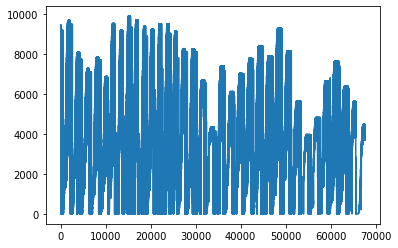

In [3]:
# Check gen_2 dataframe overall data
print(gen_2.head(5))
print(gen_2.columns)
print(gen_2.info())
print("Missing values: \n", gen_2.isnull().sum(axis=0))
gen_2['DATE_TIME'] = pd.to_datetime(gen_2['DATE_TIME'])
plt.plot(gen_2.DAILY_YIELD)

In [4]:
# Check weather_2 dataframe overall data
print(weather_2.head(5))
print(weather_2.columns)
print(weather_2.info())
print("Missing values: \n", weather_1.isnull().sum(axis=0))
weather_2['DATE_TIME'] = pd.to_datetime(weather_2['DATE_TIME'])

             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0  
Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               -------------- 

In [5]:
plant_1 = pd.merge(gen_1, weather_1, on='DATE_TIME')

# Perform first differencing on the variable TOTAL_YIELD to get the incremental yield
plant_1["INCREMENTAL_YIELD"]= plant_1["TOTAL_YIELD"].diff()
plant_1 = plant_1.drop(["TOTAL_YIELD"], axis=1)

print(plant_1.head())
print(plant_1.info())
print(plant_1.isnull().sum(axis=0))


   DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15     4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15     4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15     4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15     4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
1     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
2     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
3     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
4     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   

   IRRADIATION  INCREMENTAL_YIELD  
0          0.0                NaN  
1       

In [6]:
# Drop unnecessary columns
plant_1 = plant_1.drop(["SOURCE_KEY_x", "PLANT_ID_y", "SOURCE_KEY_y"], axis=1)
plant_1 = plant_1.rename(columns={"PLANT_ID_x": "PLANT_ID"})
print(plant_1.shape)
print(plant_1.columns)

(45680, 9)
Index(['DATE_TIME', 'PLANT_ID', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'INCREMENTAL_YIELD'],
      dtype='object')


In [7]:
# Merge plant and weather data
plant_2 = pd.merge(gen_2, weather_1, on='DATE_TIME')

# Perform first differencing on the variable TOTAL_YIELD to get the incremental yield
plant_2["INCREMENTAL_YIELD"]= plant_2["TOTAL_YIELD"].diff()
plant_2 = plant_2.drop(["TOTAL_YIELD"], axis=1)

print(plant_2.head())
print(plant_2.info())
print(plant_2.isnull().sum(axis=0))


   DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4136001  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1 2020-05-15     4136001  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2 2020-05-15     4136001  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3 2020-05-15     4136001  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4 2020-05-15     4136001  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

   PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
1     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
2     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
3     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   
4     4135001  HmiyD2TTLFNqkNe            25.184316           22.857507   

   IRRADIATION  INCREMENTAL_YIELD  
0          0.0                NaN  
1       

In [8]:
# Drop unnecessary columns
plant_2 = plant_2.drop(["SOURCE_KEY_x", "PLANT_ID_y", "SOURCE_KEY_y"], axis=1)
plant_2 = plant_2.rename(columns={"PLANT_ID_x": "PLANT_ID"})
print(plant_2.shape)
print(plant_2.columns)

(66172, 9)
Index(['DATE_TIME', 'PLANT_ID', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD',
       'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION',
       'INCREMENTAL_YIELD'],
      dtype='object')


In [9]:
# Merge plant and weather data
combined = pd.merge(plant_1, plant_2, how="outer")
#print(combined.head())
#print(combined.info())
print(combined.isnull().sum(axis=0))
print(combined.shape)
print(combined.head())

DATE_TIME              0
PLANT_ID               0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
INCREMENTAL_YIELD      2
dtype: int64
(111852, 9)
   DATE_TIME  PLANT_ID  DC_POWER  AC_POWER  DAILY_YIELD  AMBIENT_TEMPERATURE  \
0 2020-05-15   4135001       0.0       0.0          0.0            25.184316   
1 2020-05-15   4135001       0.0       0.0          0.0            25.184316   
2 2020-05-15   4135001       0.0       0.0          0.0            25.184316   
3 2020-05-15   4135001       0.0       0.0          0.0            25.184316   
4 2020-05-15   4135001       0.0       0.0          0.0            25.184316   

   MODULE_TEMPERATURE  IRRADIATION  INCREMENTAL_YIELD  
0           22.857507          0.0                NaN  
1           22.857507          0.0           -75914.0  
2           22.857507          0.0           804114.0  
3           22.857507          0.0           

In [10]:
# Remove rows with missing values
combined = combined.dropna()
print(combined.shape)

(111850, 9)


[4135001, 4136001]
Group '4135001':
                DATE_TIME  PLANT_ID  DC_POWER  AC_POWER  DAILY_YIELD  \
1     2020-05-15 00:00:00   4135001       0.0       0.0        0.000   
2     2020-05-15 00:00:00   4135001       0.0       0.0        0.000   
3     2020-05-15 00:00:00   4135001       0.0       0.0        0.000   
4     2020-05-15 00:00:00   4135001       0.0       0.0        0.000   
5     2020-05-15 00:00:00   4135001       0.0       0.0        0.000   
...                   ...       ...       ...       ...          ...   
45675 2020-06-17 23:45:00   4135001       0.0       0.0     5967.000   
45676 2020-06-17 23:45:00   4135001       0.0       0.0     5147.625   
45677 2020-06-17 23:45:00   4135001       0.0       0.0     5819.000   
45678 2020-06-17 23:45:00   4135001       0.0       0.0     5817.000   
45679 2020-06-17 23:45:00   4135001       0.0       0.0     5910.000   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  INCREMENTAL_YIELD  
1                2

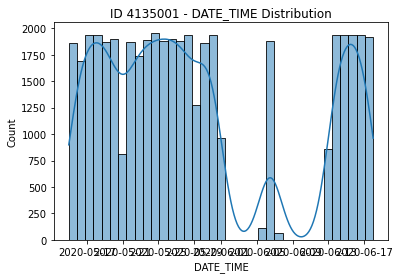

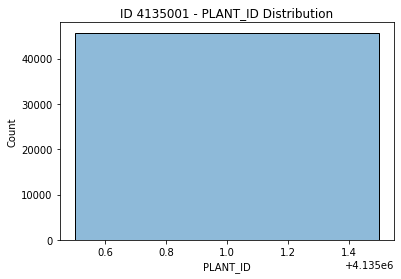

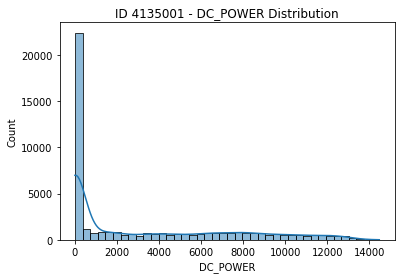

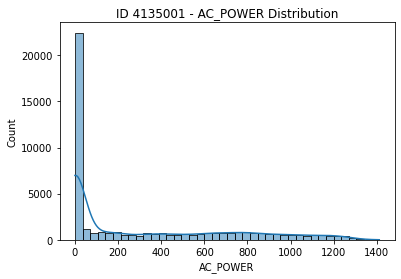

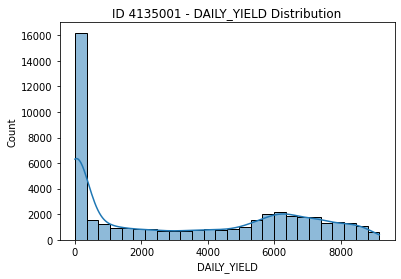

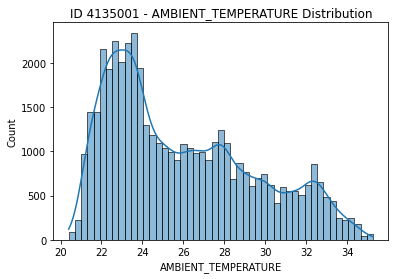

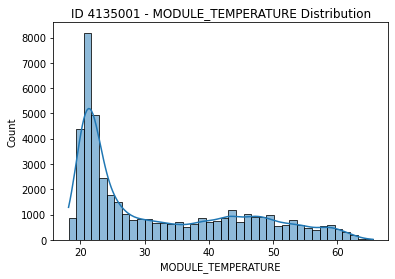

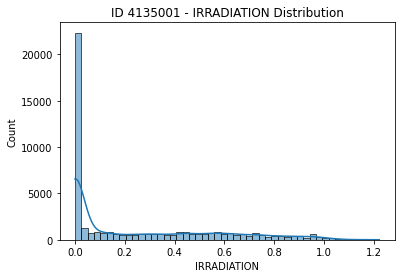

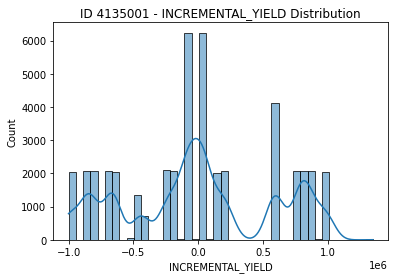

Distribution of variables for  4136001


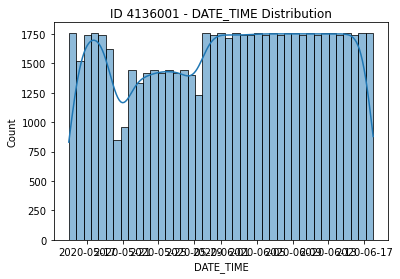

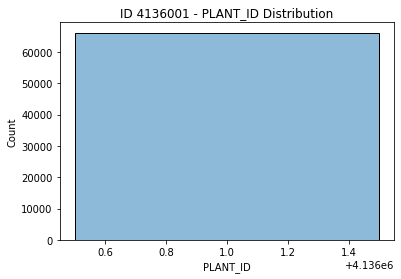

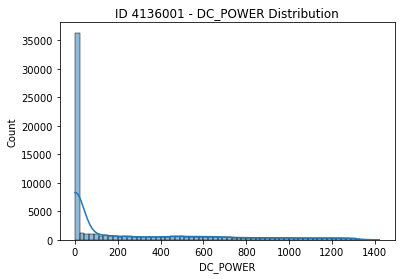

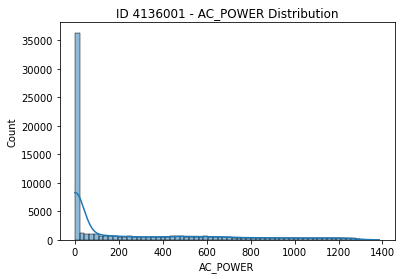

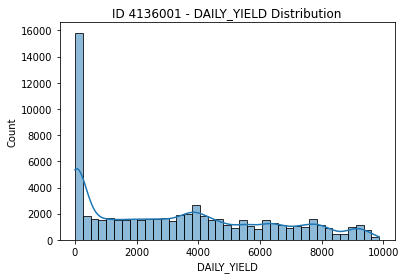

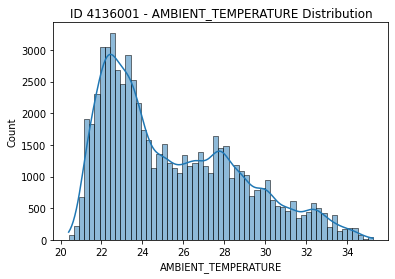

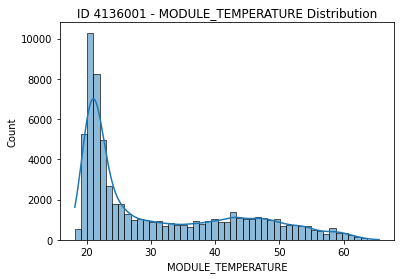

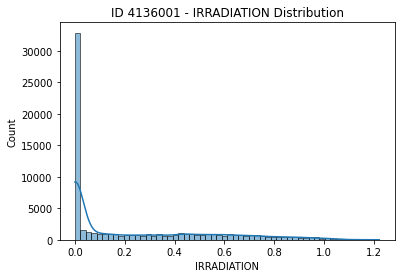

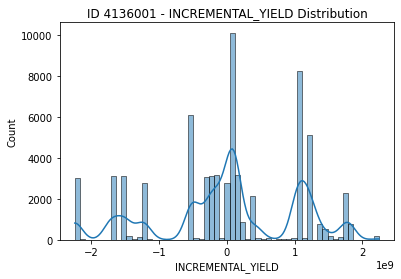

In [11]:
# Visualize data for each plant
groups = combined.groupby("PLANT_ID")

# get group names
group_names = list(groups.groups.keys())
print(group_names)

# iterate over groups and get dataframe for each group
for group_name, group_df in groups:
    print(f"Group '{group_name}':")
    print(group_df)

# iterate over each group and plot variable distributions
for group_name, group_df in groups:
    print("Distribution of variables for ", group_name)
    # iterate over columns and plot distributions
    for col in group_df.columns:
        if col != 'ID':
            sns.histplot(data=group_df, x=col, kde=True)
            plt.title(f'ID {group_name} - {col} Distribution')
            plt.show()

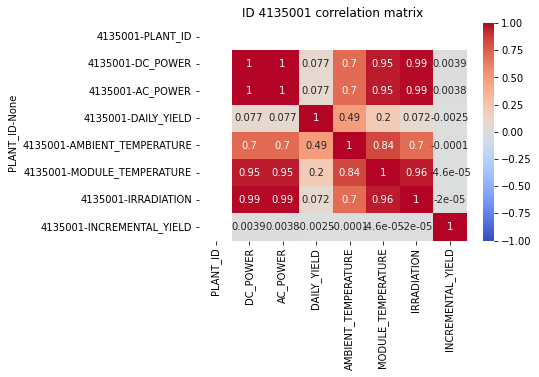

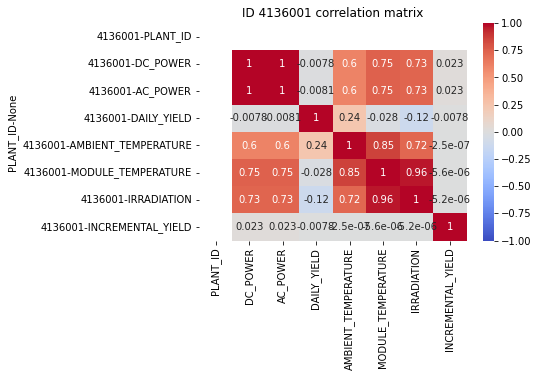

In [12]:
# group the data by the ID column and calculate the correlation matrix for each group
corr_matrices = combined.groupby('PLANT_ID')[combined.columns].corr()

# plot the resulting correlation matrices using Seaborn heatmap
for id_value, corr_matrix in corr_matrices.groupby(level=0):
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'ID {id_value} correlation matrix')
    plt.show()

In [13]:
# Target is AC_POWER. Drop unnecessary columns
combined = combined.drop(["DAILY_YIELD", "INCREMENTAL_YIELD"], axis=1)
print(combined.columns)

Index(['DATE_TIME', 'PLANT_ID', 'DC_POWER', 'AC_POWER', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION'],
      dtype='object')


In [14]:
# Set the index to Element and Time columns for the panel data
panel_data = combined.set_index(['PLANT_ID', 'DATE_TIME'])
panel_data.head()

DC_POWER  AC_POWER  AMBIENT_TEMPERATURE  \
PLANT_ID DATE_TIME                                             
4135001  2020-05-15       0.0       0.0            25.184316   
         2020-05-15       0.0       0.0            25.184316   
         2020-05-15       0.0       0.0            25.184316   
         2020-05-15       0.0       0.0            25.184316   
         2020-05-15       0.0       0.0            25.184316   

                     MODULE_TEMPERATURE  IRRADIATION  
PLANT_ID DATE_TIME                                    
4135001  2020-05-15           22.857507          0.0  
         2020-05-15           22.857507          0.0  
         2020-05-15           22.857507          0.0  
         2020-05-15           22.857507          0.0  
         2020-05-15           22.857507          0.0

In [25]:
!pip install -U linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from linearmodels import PanelOLS
from linearmodels import RandomEffects

# Run the Random Effects Model (unobserved variables are not correlated)
exog_vars = ["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
exog = sm.add_constant(panel_data[exog_vars])
mod = RandomEffects(panel_data.AC_POWER, exog)
re_results = mod.fit()
print(re_results)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                        RandomEffects Estimation Summary                        
Dep. Variable:               AC_POWER   R-squared:                        0.7198
Estimator:              RandomEffects   R-squared (Between):              0.4184
No. Observations:              111850   R-squared (Within):               0.7222
Date:                Sun, Feb 26 2023   R-squared (Overall):              0.7198
Time:                        01:17:44   Log-likelihood                -7.517e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   9.579e+04
Entities:                           2   P-value                           0.0000
Avg Obs:                    5.592e+04   Distribution:                F(3,111846)
Min Obs:                    4.568e+04                                           
Max Obs:                    6.617e+04   F-statistic (robust):          9.579e+04
                            

In [17]:
# Run the Fixed Effects Model (Assumption: unobserved variables are correlated)
mod = PanelOLS(panel_data.AC_POWER, exog, entity_effects=True)
fe_results = mod.fit()
print(fe_results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               AC_POWER   R-squared:                        0.7222
Estimator:                   PanelOLS   R-squared (Between):              0.4114
No. Observations:              111850   R-squared (Within):               0.7222
Date:                Sun, Feb 26 2023   R-squared (Overall):              0.7198
Time:                        01:17:44   Log-likelihood                -7.508e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   9.691e+04
Entities:                           2   P-value                           0.0000
Avg Obs:                    5.592e+04   Distribution:                F(3,111845)
Min Obs:                    4.568e+04                                           
Max Obs:                    6.617e+04   F-statistic (robust):          9.691e+04
                            

In [18]:
# Estimate the effects of each plant (comapred with the base plant)
combined["TIME"] = pd.Categorical(combined.DATE_TIME)
FE_ols = smf.ols(formula="AC_POWER ~	AMBIENT_TEMPERATURE +	MODULE_TEMPERATURE +	IRRADIATION + C(PLANT_ID)", data = combined).fit()
print(FE_ols.summary())


                            OLS Regression Results                            
Dep. Variable:               AC_POWER   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 7.351e+04
Date:                Sun, 26 Feb 2023   Prob (F-statistic):               0.00
Time:                        01:17:45   Log-Likelihood:            -7.5082e+05
No. Observations:              111850   AIC:                         1.502e+06
Df Residuals:                  111845   BIC:                         1.502e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -77

In [19]:
!pip3 install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=1ee76b3d21588ec825beee5348ec1e36c67d978bfe3becb23bf28d296380f704
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [ ]:
import pymc3 as pm
import arviz as az

# Specify priors on the slope coefficients for each independent variable
prior_ambient = pm.Normal.dist(mu=0, sd=1)
prior_module = pm.Normal.dist(mu=0, sd=1)
prior_irradiation = pm.Normal.dist(mu=0, sd=1)

# Set up the Bayesian linear regression model
with pm.Model() as model:
    # Define priors on the slope coefficients
    ambient_temp = pm.Normal('ambient_temp', mu=0, sd=1)
    module_temp = pm.Normal('module_temp', mu=0, sd=1)
    irradiation = pm.Normal('irradiation', mu=0, sd=1)
    
    # Define the likelihood function using a normal distribution
    sigma = pm.HalfCauchy('sigma', beta=10, testval=1.0)
    mu = ambient_temp * panel_data['AMBIENT_TEMPERATURE'] + \
         module_temp * panel_data['MODULE_TEMPERATURE'] + \
         irradiation * panel_data['IRRADIATION']
    ac_power = pm.Normal('ac_power', mu=mu, sd=sigma, observed=panel_data['AC_POWER'])
    
    # Sample from the posterior distribution
    trace = pm.sample(draws=2000, tune=1000)

# Plot posterior distributions
az.plot_trace(trace)


In [38]:
!pip3 install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pystan as stan

# Define the model
model_code = '''
data {
  int<lower=0> N;         // number of observations
  int<lower=1> K;         // number of independent variables
  vector[N] y;            // dependent variable
  matrix[N, K] X;         // independent variables
}
parameters {
  vector[K] beta;         // coefficients
  real<lower=0> sigma;    // error standard deviation
}
model {
  y ~ normal(X * beta, sigma);  // likelihood
  beta ~ normal(0, 1);          // priors on coefficients
  sigma ~ cauchy(0, 5);         // prior on error standard deviation
}
'''

# Prepare the data
data = {'N': len(panel_data), 'K': 3, 'y': panel_data['AC_POWER'], 'X': panel_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].values}

# Compile the model
model = pystan.StanModel(model_code=model_code)

# Fit the model
fit = model.sampling(data=data, iter=1000, chains=4)

# Print the summary of the posterior distribution
print(fit) 


<ipython-input-22-c387f918bba2>:7: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  combined["DATE_TIME"] = pd.DatetimeIndex(combined["DATE_TIME"]).astype(np.int64)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 111850 entries, 1 to 111851
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DATE_TIME            111850 non-null  int64  
 1   PLANT_ID             111850 non-null  int64  
 2   DC_POWER             111850 non-null  float64
 3   AC_POWER             111850 non-null  float64
 4   AMBIENT_TEMPERATURE  111850 non-null  float64
 5   MODULE_TEMPERATURE   111850 non-null  float64
 6   IRRADIATION          111850 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 6.8 MB
None


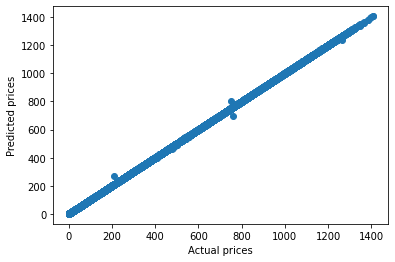

Mean squared error:  0.6722144282705271
Root mean squared error:  0.8198868386981993
R-squared:  0.9999952928621721


In [22]:
# Run the Random Forest Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert the datetime column to integer format
combined["DATE_TIME"] = pd.DatetimeIndex(combined["DATE_TIME"]).astype(np.int64) 
combined = combined.drop(["TIME"], axis=1)
print(combined.info())

# Run Random Forest Model
# Create X features set and y outcome set
X = combined.drop(["AC_POWER"], axis=1)
y = combined["AC_POWER"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

# Initiate Random Forest instance
rfr = RandomForestRegressor()

# Train model
rfr.fit(X_train, y_train)

# Predict target values for the validation set
y_pred = rfr.predict(X_val)

# Plot predicted values  against the actual values for the validation set
plt.scatter(y_val, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

# Calculate mean squared error
mse = mean_squared_error(y_val, y_pred)
print("Mean squared error: ", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

# Calculate R-squared score
r2 = r2_score(y_val, y_pred)
print("R-squared: ", r2)

Random Forest Model statistics for the test set


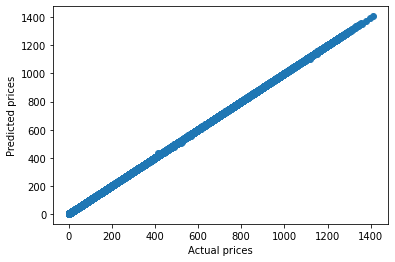

Mean squared error:  0.19599586629550275
Root mean squared error:  0.44271420385560567
R-squared:  0.9999986235808993


In [23]:
# Random Forest Model is selected as the final model
# Predict target values for the test set
y_pred = rfr.predict(X_test)

print("Random Forest Model statistics for the test set")

# Plot predicted values against the actual values for the test set
plt.scatter(y_test, y_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.show()

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print("Root mean squared error: ", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)
